# Implementation of the Needleman-Wunsch algorithm

## Importing libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import random
# Additional libraries
from sklearn.utils import shuffle
import scipy.stats as stats

In [2]:
import matplotlib.image as mpimg

In [3]:
from PIL import Image, ImageDraw

## Sequences

In [4]:
prot1 = list("KEFHNGHT")
prot2 = list("KYFHKAGNGHSPT")
print(prot1)
print(prot2)


['K', 'E', 'F', 'H', 'N', 'G', 'H', 'T']
['K', 'Y', 'F', 'H', 'K', 'A', 'G', 'N', 'G', 'H', 'S', 'P', 'T']


In [5]:
print(len(prot1))
print(len(prot2))

8
13


## Substitution matrix

As we have already seen in the formal introduction of pairwise alignment, the core of the procedure is the substitution matrix. We will use the BLOSUM62 matrix here, which we first read in from a local file and then bring into the correct (24*24) format.

In [6]:
# Substitution matrix
df_blosum62 = pd.read_csv("blosum62.txt", header=None, delim_whitespace=True)
df_blosum62

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,4,-1,-2,-2,0,-1,-1,0,-2,-1,...,-1,1,0,-3,-2,0,-2,-1,0,-4
1,-1,5,0,-2,-3,1,0,-2,0,-3,...,-2,-1,-1,-3,-2,-3,-1,0,-1,-4
2,-2,0,6,1,-3,0,0,0,1,-3,...,-2,1,0,-4,-2,-3,3,0,-1,-4
3,-2,-2,1,6,-3,0,2,-1,-1,-3,...,-1,0,-1,-4,-3,-3,4,1,-1,-4
4,0,-3,-3,-3,9,-3,-4,-3,-3,-1,...,-3,-1,-1,-2,-2,-1,-3,-3,-2,-4
5,-1,1,0,0,-3,5,2,-2,0,-3,...,-1,0,-1,-2,-1,-2,0,3,-1,-4
6,-1,0,0,2,-4,2,5,-2,0,-3,...,-1,0,-1,-3,-2,-2,1,4,-1,-4
7,0,-2,0,-1,-3,-2,-2,6,-2,-4,...,-2,0,-2,-2,-3,-3,-1,-2,-1,-4
8,-2,0,1,-1,-3,0,0,-2,8,-3,...,-2,-1,-2,-2,2,-3,0,0,-1,-4
9,-1,-3,-3,-3,-1,-3,-3,-4,-3,4,...,-3,-2,-1,-3,-1,3,-3,-3,-1,-4


At this point, the substitution matrix is a pure number matrix to which we must assign a meaning in the following. The universal arrangement of each substitution matrix allows us to assign a label to the rows and columns. We store the sequence of labels as a string in a variable *protein_header*.

In [7]:
protein_header = list("ARNDCQEGHILKMFPSTWYVBZX*")
df_blosum62.columns = protein_header
df_blosum62.index = protein_header
df_blosum62

,A,R,N,D,C,Q,E,G,H,I,...,P,S,T,W,Y,V,B,Z,X,*
A,4,-1,-2,-2,0,-1,-1,0,-2,-1,...,-1,1,0,-3,-2,0,-2,-1,0,-4
R,-1,5,0,-2,-3,1,0,-2,0,-3,...,-2,-1,-1,-3,-2,-3,-1,0,-1,-4
N,-2,0,6,1,-3,0,0,0,1,-3,...,-2,1,0,-4,-2,-3,3,0,-1,-4
D,-2,-2,1,6,-3,0,2,-1,-1,-3,...,-1,0,-1,-4,-3,-3,4,1,-1,-4
C,0,-3,-3,-3,9,-3,-4,-3,-3,-1,...,-3,-1,-1,-2,-2,-1,-3,-3,-2,-4
Q,-1,1,0,0,-3,5,2,-2,0,-3,...,-1,0,-1,-2,-1,-2,0,3,-1,-4
E,-1,0,0,2,-4,2,5,-2,0,-3,...,-1,0,-1,-3,-2,-2,1,4,-1,-4
G,0,-2,0,-1,-3,-2,-2,6,-2,-4,...,-2,0,-2,-2,-3,-3,-1,-2,-1,-4
H,-2,0,1,-1,-3,0,0,-2,8,-3,...,-2,-1,-2,-2,2,-3,0,0,-1,-4
I,-1,-3,-3,-3,-1,-3,-3,-4,-3,4,...,-3,-2,-1,-3,-1,3,-3,-3,-1,-4


In [8]:
print(df_blosum62.to_string())

   A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T   W  Y  V  B  Z  X  *
A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0  -3 -2  0 -2 -1  0 -4
R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1  -3 -2 -3 -1  0 -1 -4
N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0  -4 -2 -3  3  0 -1 -4
D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1  -4 -3 -3  4  1 -1 -4
C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1  -2 -2 -1 -3 -3 -2 -4
Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1  -2 -1 -2  0  3 -1 -4
E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1  -3 -2 -2  1  4 -1 -4
G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2  -2 -3 -3 -1 -2 -1 -4
H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2  -2  2 -3  0  0 -1 -4
I -1 -3 -3 -3 -1 -3 -3 -4 -3  4  2 -3  1  0 -3 -2 -1  -3 -1  3 -3 -3 -1 -4
L -1 -2 -3 -4 -1 -2 -3 -4 -3  2  4 -2  2  0 -3 -2 -1  -2 -1  1 -4 -3 -1 -4
K -1  2  0 -1 -3  1  1 -2 -1 -3 -2  5 -1 -3 -1  0 -1  -3 -2 -2  0  1 -1 -4
M -1 -1 -2 -3 -1  0 -2 -3

First, we need a function that extracts the corresponding entry from the substitution matrix for two given symbols. 

The definition of this function *coord_fun* is done as follows. First, the two symbols are written into temporary variables (e.g. `tmp1 = seq1[posA]`); then the position of these symbols in the label list is queried (`tmp3 = ref.index(tmp1)`; finally, these two positions can be used to access the matrix element. Altogether one has:

In [9]:
def coord_fun():
    statemen1
    ...

In [10]:
print(protein_header.index('N'))

2


In [11]:
def coord_fun(
    ref,  #protein reference sequence 
    seq1, #first protein sequence
    seq2, #second protein sequence
    posA, #position in first sequence. ATTENTION: positions start 0,1,2, ...
    posB, #position in second sequence. ATTENTION: positions start 0,1,2, ...
    mat,  #substitution matrix
):
    """This gives us substitution matrix entries for the coordinates in the two sequences.
    """
    tmp1 = seq1[posA]
    tmp2 = seq2[posB]
    tmp3 = ref.index(tmp1)
    tmp4 = ref.index(tmp2)
    return mat.iloc[tmp3,tmp4]

If, for example, one wants to determine the entry of the substitution matrix among the available variable designations, which indicates the score for a pairing of the respective second symbol of the sequences, this is done with the command:

In [12]:
coord_fun(protein_header, prot1, prot2, 1, 1, df_blosum62)

-2

The somewhat elaborate design of our function *coord_fun* now proves to be advantageous. By using the symbol positions, we can immediately create a matrix that contains the corresponding score for each symbol pair of the two sequences. We achieve this by running two `for`-loops, one nested into the other.

In [13]:
# initialize a dataframe with all entries zeros
df_coord_tab = pd.DataFrame(
    data = np.zeros( (len(prot1), len(prot2)), dtype=int), 
    index = prot1, 
    columns = prot2
)

# run two loops to fill each entry according to the coord_fun
for p1 in range(len(prot1)):
    for p2 in range(len(prot2)):
        df_coord_tab.iloc[p1,p2] = coord_fun(protein_header, prot1, prot2, p1, p2, df_blosum62)


In [14]:
print(df_coord_tab.to_string())

   K  Y  F  H  K  A  G  N  G  H  S  P  T
K  5 -2 -3 -1  5 -1 -2  0 -2 -1  0 -1 -1
E  1 -2 -3  0  1 -1 -2  0 -2  0  0 -1 -1
F -3  3  6 -1 -3 -2 -3 -3 -3 -1 -2 -4 -2
H -1  2 -1  8 -1 -2 -2  1 -2  8 -1 -2 -2
N  0 -2 -3  1  0 -2  0  6  0  1  1 -2  0
G -2 -3 -3 -2 -2  0  6  0  6 -2  0 -2 -2
H -1  2 -1  8 -1 -2 -2  1 -2  8 -1 -2 -2
T -1 -2 -2 -2 -1  0 -2  0 -2 -2  1 -1  5


## Initialization

The initialisation of the *F-matrix* for the **Needleman-Wunsch procedure** is done by inserting a zero row and column containing the cumulative gap penalty as entries. First we set the gap penalty:

In [15]:
gap_penalty = -5

In [16]:
df_matF_matrix = pd.DataFrame(
    data = np.zeros( (len(prot1)+1, len(prot2)+1), dtype=int),
    index = ['.'] + prot1, 
    columns = ['.'] + prot2
)

df_matF_pointer = pd.DataFrame(
    data = np.zeros( (len(prot1)+1, len(prot2)+1), dtype=int),
    index = ['.'] + prot1, 
    columns = ['.'] + prot2
)
print(df_matF_matrix.to_string())

   .  K  Y  F  H  K  A  G  N  G  H  S  P  T
.  0  0  0  0  0  0  0  0  0  0  0  0  0  0
K  0  0  0  0  0  0  0  0  0  0  0  0  0  0
E  0  0  0  0  0  0  0  0  0  0  0  0  0  0
F  0  0  0  0  0  0  0  0  0  0  0  0  0  0
H  0  0  0  0  0  0  0  0  0  0  0  0  0  0
N  0  0  0  0  0  0  0  0  0  0  0  0  0  0
G  0  0  0  0  0  0  0  0  0  0  0  0  0  0
H  0  0  0  0  0  0  0  0  0  0  0  0  0  0
T  0  0  0  0  0  0  0  0  0  0  0  0  0  0


In [17]:
test_list = []
for i in range(len(prot2)+1):
    test_list.append(gap_penalty*i)

print(test_list)

[0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50, -55, -60, -65]


In [18]:
[gap_penalty*i for i in range(len(prot2)+1)]

[0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50, -55, -60, -65]

In [19]:
df_matF_matrix.iloc[0, :] = [gap_penalty*i for i in range(len(prot2)+1)]
df_matF_matrix.iloc[:, 0] = [gap_penalty*i for i in range(len(prot1)+1)]

# 0: diagonal, 1: upwards, 2: left
df_matF_pointer.iloc[0, 1:] = 2
df_matF_pointer.iloc[1:, 0] = 1

In [20]:
df_matF_matrix

,.,K,Y,F,H,K,A,G,N,G,H,S,P,T
.,0,-5,-10,-15,-20,-25,-30,-35,-40,-45,-50,-55,-60,-65
K,-5,0,0,0,0,0,0,0,0,0,0,0,0,0
E,-10,0,0,0,0,0,0,0,0,0,0,0,0,0
F,-15,0,0,0,0,0,0,0,0,0,0,0,0,0
H,-20,0,0,0,0,0,0,0,0,0,0,0,0,0
N,-25,0,0,0,0,0,0,0,0,0,0,0,0,0
G,-30,0,0,0,0,0,0,0,0,0,0,0,0,0
H,-35,0,0,0,0,0,0,0,0,0,0,0,0,0
T,-40,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df_matF_pointer

,.,K,Y,F,H,K,A,G,N,G,H,S,P,T
.,0,2,2,2,2,2,2,2,2,2,2,2,2,2
K,1,0,0,0,0,0,0,0,0,0,0,0,0,0
E,1,0,0,0,0,0,0,0,0,0,0,0,0,0
F,1,0,0,0,0,0,0,0,0,0,0,0,0,0
H,1,0,0,0,0,0,0,0,0,0,0,0,0,0
N,1,0,0,0,0,0,0,0,0,0,0,0,0,0
G,1,0,0,0,0,0,0,0,0,0,0,0,0,0
H,1,0,0,0,0,0,0,0,0,0,0,0,0,0
T,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Recursion

For recursion through *F-matrices*, we again use two nested loops, thus visiting each entry of the *F-matrices*, row-wise. Inside the loops there is simply the **maximum** query between the three preceding matrix entries (calculated with score and gap penalty), as we have already learned. Since we need this maximum query both to determine the matrix element and to determine the pointer, we store the three-element list in a variable *tmp1* in order to then access it to determine the matrix element. `np.max()` finds the maximum value in the array, `np.argmax()` find the position of that maximum entry.

In [22]:
# 0: diagonal, 1: upwards, 2: left
for p1 in range(1, len(prot1)+1):
    for p2 in range(1, len(prot2)+1):
        tmp1 = [
                df_matF_matrix.iloc[p1-1, p2-1] \
                    + coord_fun(protein_header, prot1, prot2, p1-1, p2-1, df_blosum62), #diagonal
                df_matF_matrix.iloc[p1-1, p2] + gap_penalty, #upwards
                df_matF_matrix.iloc[p1, p2-1] + gap_penalty, #left
        ]

        df_matF_matrix.iloc[p1,p2] = np.max(tmp1) 
        
        df_matF_pointer.iloc[p1,p2] = np.argmax(tmp1)

The pointer extraction is still interesting: We have organised the three-element list in such a way that the element position corresponds to the code of the pointer introduced above: If the first element returns the maximum, the pointer state is just 0 ('diagonal') and so on. In this way, the pointer state can be determined quite elegantly by `np.argmax()`. 

We now turn to the output of the result. 

The goal is to map the *F-matrix*, enter the pointers as arrows and finally obtain the optimal path that results from tracing back from the lower right matrix element. 

In a second step, we will suppress the output of these side calculations and only output the actual alignment of the two sequences.

In [23]:
display(df_matF_matrix)
display(df_matF_pointer)

,.,K,Y,F,H,K,A,G,N,G,H,S,P,T
.,0,-5,-10,-15,-20,-25,-30,-35,-40,-45,-50,-55,-60,-65
K,-5,5,0,-5,-10,-15,-20,-25,-30,-35,-40,-45,-50,-55
E,-10,0,3,-2,-5,-9,-14,-19,-24,-29,-34,-39,-44,-49
F,-15,-5,3,9,4,-1,-6,-11,-16,-21,-26,-31,-36,-41
H,-20,-10,-2,4,17,12,7,2,-3,-8,-13,-18,-23,-28
N,-25,-15,-7,-1,12,17,12,7,8,3,-2,-7,-12,-17
G,-30,-20,-12,-6,7,12,17,18,13,14,9,4,-1,-6
H,-35,-25,-17,-11,2,7,12,15,19,14,22,17,12,7
T,-40,-30,-22,-16,-3,2,7,10,15,17,17,23,18,17


,.,K,Y,F,H,K,A,G,N,G,H,S,P,T
.,0,2,2,2,2,2,2,2,2,2,2,2,2,2
K,1,0,2,2,2,0,2,2,2,2,2,2,2,2
E,1,1,0,2,0,0,2,2,2,2,2,2,2,2
F,1,1,0,0,2,2,2,2,2,2,2,2,2,2
H,1,1,1,1,0,2,2,2,2,2,0,2,2,2
N,1,1,1,1,1,0,2,0,0,2,2,2,2,2
G,1,1,1,1,1,1,0,0,2,0,2,2,2,2
H,1,1,1,1,0,1,1,0,0,2,0,2,2,2
T,1,1,1,1,1,1,0,0,0,0,1,0,2,0


In [24]:

import dataframe_image as dfi


In [25]:
dfi.export(df_matF_matrix, 'df_matF_matrix.png') 

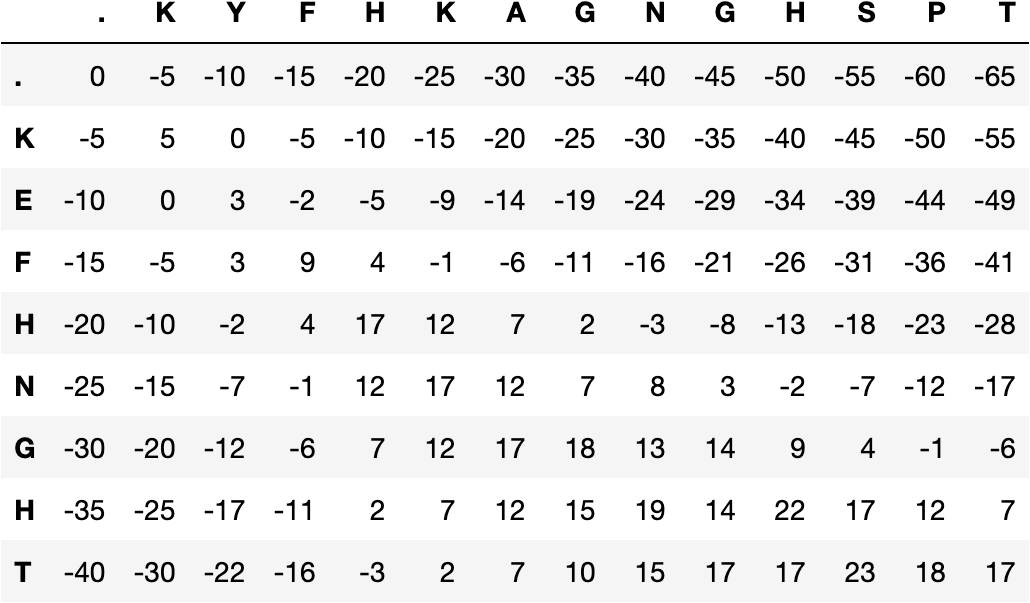

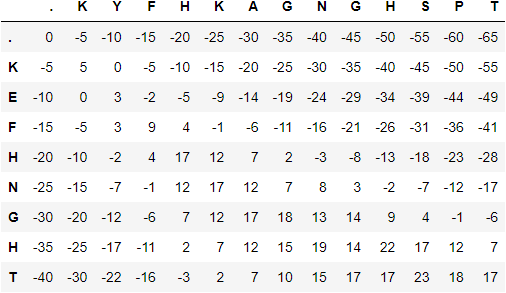

In [26]:
im = Image.open("df_matF_matrix.png")
im

The next step is to enter the pointers into this output graphic.

In [27]:
im_dim = im.size
print(im_dim)

(506, 293)


In [28]:
unit_x = im_dim[0] / (len(prot2) + 1.75)
unit_y = im_dim[1] / (len(prot1) + 1.75)
print(unit_x, unit_y)

34.30508474576271 30.05128205128205


As before with the coordinates of the text command, the exact choice of scaling factors and coordinate specifications has been determined purely empirically by trial-and-error. One can see how these coordinates change with the position in the matrix (the arguments of the arrA function). The corresponding commands for the other two states of the pointer variables are:  

In [29]:
def arrows(
    length_seq1, # length of sequence-1; prot2
    length_seq2, # length of sequence-2; prot1
    mx,          # x coordinate (sequence in column; prot2), left-most 1, right-most 13
    my,          # y coordinate (sequence in rows; prot1), top-most 1, bottom-most 8
    pointer,     # 0: diagonal, 1: upwards, 2: left
    arrow_color = (0,0,255) # default color blue
):
    nx = length_seq1 - mx + 1
    ny = length_seq2 - my + 1
    
    radius = 3
    
    if pointer == 0:
        c1 = (im_dim[0] - nx*unit_x + unit_x/3.0, im_dim[1] - ny*unit_y + unit_y/3.0)
        c2 = (im_dim[0] - (nx+1)*unit_x + unit_x/1.25, im_dim[1] - (ny+1)*unit_y + unit_y/1.25)
        d.line([c1, c2], fill=arrow_color, width=2)
        d.ellipse((c2[0]-radius, c2[1]-radius, c2[0]+radius, c2[1]+radius), fill=arrow_color, outline=(0, 0, 0))

    if pointer == 1:
        c3 = (im_dim[0] - nx*unit_x + unit_x/1.75, im_dim[1] - ny*unit_y + unit_y/3.0)
        c4 = (im_dim[0] - nx*unit_x + unit_x/1.75, im_dim[1] - (ny+1)*unit_y + unit_y/1.25)
        d.line([c3, c4], fill=arrow_color, width=2)
        d.ellipse((c4[0]-radius, c4[1]-radius, c4[0]+radius, c4[1]+radius), fill=arrow_color, outline=(0, 0, 0))

    if pointer == 2:
        c5 = (im_dim[0] - nx*unit_x + unit_x/3.0, im_dim[1] - ny*unit_y + unit_y/2.1)
        c6 = (im_dim[0] - (nx+1)*unit_x + unit_x/1.1, im_dim[1] - (ny)*unit_y + unit_y/2.1)
        d.line([c5, c6], fill=arrow_color, width=2)
        d.ellipse((c6[0]-radius, c6[1]-radius, c6[0]+radius, c6[1]+radius), fill=arrow_color, outline=(0, 0, 0))


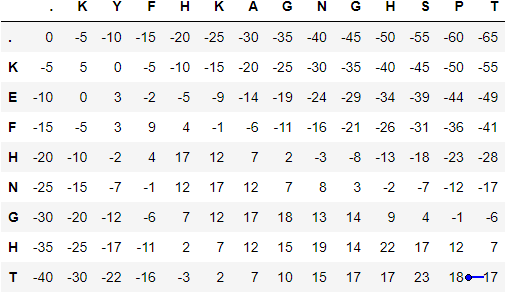

In [30]:
im = Image.open("df_matF_matrix.png")
d = ImageDraw.Draw(im)

# 0: diagonal, 1: upwards, 2: left
arrows(len(prot2), len(prot1), 13, 8, 2)

im.save("drawn_grid.png")
im

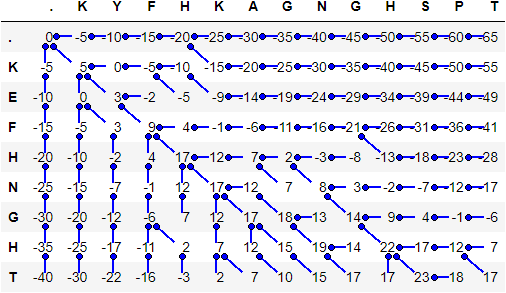

In [31]:
im = Image.open("df_matF_matrix.png")
d = ImageDraw.Draw(im)

for i in range(len(prot2)+1):
    for j in range(len(prot1)+1):
        if (i == 0) and (j == 0):
            pass # do nothing
        else:
            arrows(len(prot2), len(prot1), i, j, df_matF_pointer.iloc[j,i])        

im.save("drawn_grid.png")
im

In [32]:
# 0: diagonal, 1: upwards, 2: left
print (df_matF_matrix.iloc[len(prot1), len(prot2)],
        df_matF_pointer.iloc[len(prot1), len(prot2)])

17 0


## Traceback

The previous commands and evaluations provide the infrastructure to now be able to include the core of the Needleman-Wunsch algorithm in the considerations, namely the determination of the path through this matrix that corresponds to the highest alignment score of the two sequences. Let us first introduce a shortcut for the matrix dimension and extract the lower right element, which is the starting point for the optimal path in the Needleman-Wunsch algorithm.

First we initialize the starting indices of the path as the bottom-right indices, into $x$ and $y$ variables.

Second, with a `while` loop, which checks whether the end (more precisely: the beginning) of the two sequences has been reached, the path can now be constructed recursively. Whenever the pointer state 0 ('diagonal') is present at the current matrix position, both $x$ and $y$ indices are decreased by one, otherwise only one index at a time. 

In [33]:
x,y = len(prot1), len(prot2)
optimal_path_coord = [(x,y)]

while x != 0 and y != 0:
    p = df_matF_pointer.iloc[x,y]
    
    if p == 0: #diagonal
        x = x-1
        y = y -1 
    elif p == 1: #upwards
        x = x-1
    elif p == 2: # leftwards
        y = y-1
        
    optimal_path_coord.append((x,y))

print(optimal_path_coord)

[(8, 13), (7, 12), (7, 11), (7, 10), (6, 9), (5, 8), (4, 7), (4, 6), (4, 5), (4, 4), (3, 3), (2, 2), (1, 1), (0, 0)]


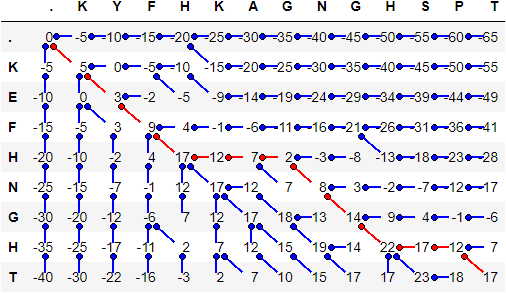

In [34]:
for i,j in optimal_path_coord[:-1]:
    arrows(len(prot2), len(prot1), j, i, df_matF_pointer.iloc[i,j], arrow_color=(255,0,0))
im   

In [35]:
print(prot1)
print(prot2)

['K', 'E', 'F', 'H', 'N', 'G', 'H', 'T']
['K', 'Y', 'F', 'H', 'K', 'A', 'G', 'N', 'G', 'H', 'S', 'P', 'T']


In [36]:
x,y = len(prot1), len(prot2)
optimal_alignment = []

while x != 0 and y != 0:
    p = df_matF_pointer.iloc[x,y]
    
    if p == 0: #diagonal
        symbol_1 = prot1[x-1]
        symbol_2 = prot2[y-1]
        symbol_m = '|' if symbol_1==symbol_2 else ''
        x = x-1
        y = y -1 
    elif p == 1: #upwards
        symbol_1 = prot1[x-1]
        symbol_2 = '-'
        symbol_m = ''
        x = x-1
    elif p == 2: # leftwards
        symbol_1 = '-'
        symbol_2 = prot2[y-1]
        symbol_m = ''
        y = y-1
        
    optimal_alignment.append([symbol_1, symbol_m, symbol_2])

In [37]:
optimal_alignment

[['T', '|', 'T'],
 ['-', '', 'P'],
 ['-', '', 'S'],
 ['H', '|', 'H'],
 ['G', '|', 'G'],
 ['N', '|', 'N'],
 ['-', '', 'G'],
 ['-', '', 'A'],
 ['-', '', 'K'],
 ['H', '|', 'H'],
 ['F', '|', 'F'],
 ['E', '', 'Y'],
 ['K', '|', 'K']]

In [38]:
optimal_alignment.reverse()
optimal_alignment

[['K', '|', 'K'],
 ['E', '', 'Y'],
 ['F', '|', 'F'],
 ['H', '|', 'H'],
 ['-', '', 'K'],
 ['-', '', 'A'],
 ['-', '', 'G'],
 ['N', '|', 'N'],
 ['G', '|', 'G'],
 ['H', '|', 'H'],
 ['-', '', 'S'],
 ['-', '', 'P'],
 ['T', '|', 'T']]

In [39]:
df_aligned = pd.DataFrame(optimal_alignment).T
df_aligned

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,K,E,F,H,-,-,-,N,G,H,-,-,T
1,|,,|,|,,,,|,|,|,,,|
2,K,Y,F,H,K,A,G,N,G,H,S,P,T


In [40]:
# .style.hide_index()
df_aligned.columns = ['' for i in range(df_aligned.shape[1])]
print(df_aligned.to_string(index=False))

                                      
 K  E  F  H  -  -  -  N  G  H  -  -  T
 |     |  |           |  |  |        |
 K  Y  F  H  K  A  G  N  G  H  S  P  T


## Final alignment routine

In [41]:
def alignment(seq1, seq2, sub_mat, gp = -5):
    # initialization
    # init. 1
    df_matF_matrix = pd.DataFrame(
        data = np.zeros( (len(seq1)+1, len(seq2)+1), dtype=int),
        index = ['.'] + seq1, 
        columns = ['.'] + seq2
    )

    df_matF_pointer = pd.DataFrame(
        data = np.zeros( (len(seq1)+1, len(seq2)+1), dtype=int),
        index = ['.'] + seq1, 
        columns = ['.'] + seq2
    )
    
    # init. 2
    df_matF_matrix.iloc[0, :] = [gp*i for i in range(len(seq2)+1)]
    df_matF_matrix.iloc[:, 0] = [gp*i for i in range(len(seq1)+1)]

    df_matF_pointer.iloc[0, 1:] = 2
    df_matF_pointer.iloc[1:, 0] = 1
    
    # iteration
    # 0: diagonal, 1: upwards, 2: left
    for p1 in range(1, len(seq1)+1):
        for p2 in range(1, len(seq2)+1):
            tmp1 = [
                    df_matF_matrix.iloc[p1-1, p2-1] \
                        + coord_fun(protein_header, seq1, seq2, p1-1, p2-1, sub_mat),
                    df_matF_matrix.iloc[p1-1, p2] + gp,
                    df_matF_matrix.iloc[p1, p2-1] + gp,
            ]

            df_matF_matrix.iloc[p1,p2] = np.max(tmp1)

            df_matF_pointer.iloc[p1,p2] = np.argmax(tmp1)
            
    # trace back
    x,y = len(seq1), len(seq2)
    optimal_alignment = []

    while x != 0 and y != 0:
        p = df_matF_pointer.iloc[x,y]

        if p == 0: #diagonal
            symbol_1 = seq1[x-1]
            symbol_2 = seq2[y-1]
            symbol_m = '|' if symbol_1==symbol_2 else ''
            x = x-1
            y = y -1 
        elif p == 1: #upwards
            symbol_1 = seq1[x-1]
            symbol_2 = '-'
            symbol_m = ''
            x = x-1
        elif p == 2: # leftwards
            symbol_1 = '-'
            symbol_2 = seq2[y-1]
            symbol_m = ''
            y = y-1

        optimal_alignment.append([symbol_1, symbol_m, symbol_2])

    # alignment output
    optimal_alignment.reverse()
    df_aligned = pd.DataFrame(optimal_alignment).T
    # .style.hide_index()
    df_aligned.columns = ['' for i in range(df_aligned.shape[1])]
    print(df_aligned.to_string(index=False))

We then have an alignment command that has four arguments: the two sequences, the substitution matrix and the value of the gap penalty.

We first check whether the previous alignment can be reproduced with this new routine:

In [42]:
alignment(prot1, prot2, df_blosum62, gp = -5)

                                      
 K  E  F  H  -  -  -  N  G  H  -  -  T
 |     |  |           |  |  |        |
 K  Y  F  H  K  A  G  N  G  H  S  P  T


In [43]:
alignment(prot2, prot1, df_blosum62, gp = -5)

                                      
 K  Y  F  H  K  A  G  N  G  H  S  P  T
 |     |  |           |  |  |        |
 K  E  F  H  -  -  -  N  G  H  -  -  T


As the first application of this new routine, we want to examine the dependence of this result on the gap penalty in more detail.

In [44]:
alignment(prot1, prot2, df_blosum62, gp = -1)

                                      
 K  E  F  H  -  -  -  N  G  H  -  -  T
 |     |  |           |  |  |        |
 K  Y  F  H  K  A  G  N  G  H  S  P  T


In [45]:
alignment(prot1, prot2, df_blosum62, gp = 0)

                                         
 K  -  E  F  H  -  -  -  N  G  H  -  -  T
 |        |  |           |  |  |        |
 K  Y  -  F  H  K  A  G  N  G  H  S  P  T


As discussed in the lecture, the following function is exactly the same as the alignment function above, but instead of the alignment itself it outputs the alignment score.

In [46]:
def alignment_score(seq1, seq2, sub_mat, gp = -5):
    # initialization
    # init. 1
    df_matF_matrix = pd.DataFrame(
        data = np.zeros( (len(seq1)+1, len(seq2)+1), dtype=int),
        index = ['.'] + seq1, 
        columns = ['.'] + seq2
    )

    df_matF_pointer = pd.DataFrame(
        data = np.zeros( (len(seq1)+1, len(seq2)+1), dtype=int),
        index = ['.'] + seq1, 
        columns = ['.'] + seq2
    )
    
    # init. 2
    df_matF_matrix.iloc[0, :] = [gp*i for i in range(len(seq2)+1)]
    df_matF_matrix.iloc[:, 0] = [gp*i for i in range(len(seq1)+1)]

    df_matF_pointer.iloc[0, 1:] = 2
    df_matF_pointer.iloc[1:, 0] = 1
    
    # iteration
    # 0: diagonal, 1: upwards, 2: left
    for p1 in range(1, len(seq1)+1):
        for p2 in range(1, len(seq2)+1):
            tmp1 = [
                    df_matF_matrix.iloc[p1-1, p2-1] \
                        + coord_fun(protein_header, seq1, seq2, p1-1, p2-1, sub_mat),
                    df_matF_matrix.iloc[p1-1, p2] + gp,
                    df_matF_matrix.iloc[p1, p2-1] + gp,
            ]

            df_matF_matrix.iloc[p1,p2] = np.max(tmp1)

            df_matF_pointer.iloc[p1,p2] = np.argmax(tmp1)
    
    # calculate the alignment score        
    score = df_matF_matrix.iloc[-1,-1]
    
    return score

In [47]:
alignment_score(prot1, prot2, df_blosum62, gp = -5)

17

## Exercise

### Randomize ('shuffle') the two protein sequences and recompute the alignment. Do this 1000 times and store the corresponding alignment scores. Compare with the alignment score of the original sequences (by computing the corresponding $z$-score).

In [49]:
# Given sequences to shuffle
prot1 = list("KEFHNGHT")
prot2 = list("KYFHKAGNGHSPT")
#Creating a list to store the alignment score
a = []
gp = -1
# Applying nested loop to go throuigh all the shuffled sequences
# For convenience the range is set to 5 but can be changed according for 1000 times
for x in range(5):
    random.shuffle(prot1)
    random.shuffle(prot2)
    print("Prot 1 after shuffle : " + str(prot1))
    print("Prot 2 after shuffle : " + str(prot2)) 
    # Find the alignment score for each two pair
    alignment(prot1, prot2, df_blosum62, gp )
    # Storing and printing the alignment score for each pair
    a.append(alignment_score(prot1, prot2, df_blosum62, gp = -1))
    print("alignment_score : " + str(alignment_score(prot1, prot2, df_blosum62, gp = -1)))
# Printing the list of all alignment scores and the corresponding z-score for each score   
print("List of alignment score:",a)
print("The Z- score  for each alignment score is:", stats.zscore(a))

Prot 1 after shuffle : ['H', 'K', 'F', 'N', 'H', 'G', 'E', 'T']
Prot 2 after shuffle : ['S', 'K', 'G', 'F', 'P', 'H', 'K', 'N', 'Y', 'H', 'T', 'G', 'A']
                             
 H  K  F  N  -  H  -  G  E  T
 |  |     |     |     |      
 H  K  -  N  Y  H  T  G  -  A
alignment_score : 24
Prot 1 after shuffle : ['T', 'H', 'G', 'K', 'E', 'F', 'N', 'H']
Prot 2 after shuffle : ['H', 'H', 'A', 'K', 'G', 'G', 'T', 'N', 'P', 'F', 'S', 'Y', 'K']
                                      
 T  H  -  -  -  G  -  K  E  F  N  H  -
    |           |           |         
 H  H  A  K  G  G  T  N  P  F  S  Y  K
alignment_score : 15
Prot 1 after shuffle : ['E', 'T', 'K', 'N', 'H', 'F', 'H', 'G']
Prot 2 after shuffle : ['K', 'K', 'G', 'F', 'H', 'A', 'Y', 'P', 'H', 'S', 'N', 'G', 'T']
                                         
 E  T  K  N  -  H  -  F  -  H  -  -  G  -
       |        |           |        |   
 K  -  K  G  F  H  A  Y  P  H  S  N  G  T
alignment_score : 24
Prot 1 after shuffle : ['H', 'G', 

### Take two protein sequences from a database (they should have an evolutionary similarity) and compute their alignment. Study how the result varies with the gap penalty.

In [51]:
# Sequences of two related proteins obtained from RCSB protein data bank--https://www.rcsb.org/
prot1 = list("GIGDPVTCLKSGAICHPVFCPRRYKQIGTCGLPGTKCCKKP") # HUMAN BETA-DEFENSIN 2 DOI: 10.2210/pdb1FD3/pdb
prot2 = list("APLSCGRNGGVCIPIRCPVPMRQIGTCFGRPVKCCRSW") # Bovine BETA-DEFENSIN 12 DOI: 10.2210/pdb1BNB/pdb
# Assigning initial gap penalty -1
gp=-1
# Varying gap penatlty in a defined range to analyze how alignment varies
for i in range(0, 3): 
    # Find the alignment score for each two pair
    alignment(prot1, prot2, df_blosum62, gp )
    a=alignment_score(prot1, prot2, df_blosum62, gp)
    print("alignment_score : " + str(a))
    gp = gp - i       
   # Calculate the alignment score for each pair
    b=alignment_score(prot1, prot2, df_blosum62, gp)
    print("alignment_score : " + str(b))
    # Printing the change in alignment with the change in gap penalty
    print("change in gap: "+str(i) +"|" "change in alignment score:"+str(a-b))
    

                                                                                                                                         
 G  D  P  V  T  C  -  L  K  S  G  A  I  C  -  H  P  V  -  F  C  -  -  P  R  R  Y  K  Q  I  G  T  C  -  G  L  P  G  T  K  C  C  K  K  -  P
       |        |              |        |        |           |        |     |        |  |  |  |  |     |     |        |  |  |            
 A  -  P  L  S  C  G  -  R  N  G  G  V  C  I  -  P  I  R  -  C  P  V  P  M  R  -  -  Q  I  G  T  C  F  G  R  P  -  V  K  C  C  R  S  W  -
alignment_score : 117
alignment_score : 117
change in gap: 0|change in alignment score:0
                                                                                                                                         
 G  D  P  V  T  C  -  L  K  S  G  A  I  C  -  H  P  V  -  F  C  -  -  P  R  R  Y  K  Q  I  G  T  C  -  G  L  P  G  T  K  C  C  K  K  -  P
       |        |              |        |        |           |        |     |      

### Create random protein sequences using only a small (5-element) subset of allowed symbols (e.g., {C,H,P,W,Y}) and compute the average score as a function of the gap penalty.

In [54]:
# Chosen subset of allowed amino acid symbols to shuffle
prot1 = list("CHPWY")
prot2 = list("CHPWY")
# Average score at constant gap Penalty
gp = -1
# Applying nested loop to change gap pentaly and no. of shuffling
for j in range(1,5):
# Creating a list
    l= []
    print( "Current Gap Penalty:", gp)
    for i in range(1,5):
        random.shuffle(prot1)
        random.shuffle(prot2)
        a=alignment_score(prot1, prot2, df_blosum62, gp)
        print("alignment_score : " + str(a))
        l.append(a)
    print("Average Score at gp:", gp, ":" ,np.mean(l))
    gp = gp - j

Current Gap Penalty: -1
alignment_score : 23
alignment_score : 22
alignment_score : 19
alignment_score : 31
Average Score at gp: -1 : 23.75
Current Gap Penalty: -2
alignment_score : 18
alignment_score : 19
alignment_score : 18
alignment_score : 20
Average Score at gp: -2 : 18.75
Current Gap Penalty: -4
alignment_score : 11
alignment_score : 2
alignment_score : 23
alignment_score : 17
Average Score at gp: -4 : 13.25
Current Gap Penalty: -7
alignment_score : 20
alignment_score : 21
alignment_score : 11
alignment_score : 20
Average Score at gp: -7 : 18.0
